<a href="https://colab.research.google.com/github/YFrite/colabEDA/blob/main/Project_1_EDA_Netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from random import randint
from sklearn.cluster import KMeans, DBSCAN
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from scipy.spatial import Voronoi, voronoi_plot_2d
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

%matplotlib inline 

pd.set_option('display.max_rows', 500)

# Визуальный анализ рейтингов шоу Netflix
<img src="https://pp.userapi.com/c854528/v854528797/c62ce/FiPEibYUxJc.jpg" width="40%">

Netflix за последние 5-10 лет обзавелись большим количеством зрителей. С увеличением числа зрителей увеличилось и разнообразие шоу. Соответственно, перед аналитиками из киноиндустрии встала задача исследования данных с рейтингами различных сериалов.  
В данном задании вам предстоит провести визуальный анализ датасета **1000 Netflix Shows** (по состоянию на 11.06.2017) и сделать выводы.  



### Описание признаков:
* `title` - название шоу.
* `rating` - рейтинг шоу. Например: G, PG, TV-14, TV-MA.
* `ratingLevel` - описание рейтинговой группы и особенностей шоу.
* `ratingDescription` - рейтинг шоу, закодированный в числом.
* `release year` - год выпуска шоу.
* `user rating score` - оценка пользователей.
* `user_rating_size` - общий рейтинг пользователей.

## Требования к групповому проекту

В качестве результата ваша группа должна получить презентацию и защитить ее на дополнительном занятии.  
Ссылка на шаблон к презентации: лежит рядом с заданием в классруме.  
Вы можете менять оформление презентации, но помните, что результат должен быть релевантен для демонстрации заказчику. Например, вставлять в презентацию строчки кода или злоупотреблять скринами блокнота не стоит :)

Помимо презентации, каждому из участников проекта нужно будет сдать свой notebook c решением на проверку. Наши ассистенты проверять ваш код, визуализацию и выводы. 

### Вопросы, на которые нужно ответить в презентации: 
- Сколько рейтинговых групп представлено в данных?
- Какие оценки пользователи ставят чаще всего?
- Какие оценки пользователи ставят в среднем?
- В какие годы были запущены шоу?
- Можно ли сделать вывод, что 2017 год успешнее для Netflix?
- В каких рейтинговых группах запущены шоу на Netflix?
- Выберите любое шоу (например, самое понравившееся) и составьте его описательный портрет. На какие вопросы о нем вам было бы интересно ответить, если бы вы были заказчиком? Ответьте на эти вопросы :) 

Вопросы ниже помогут вам ответить на вопросы из презентации и сопроводить выводы релевантной визуализацией. 

Любой хороший Data Scientist должен уметь работать в команде, поэтому распределение ваших усилий в проекте остается за вами. Как пример, вы можете распределить вопросы/слайды между собой.

### Полезные замечания и советы
- Следите за тем, чтобы все графики на слайдах можно было прочитать даже без ваших комментариев;
- Не нужно делать просто текстовые слайды;
- Не обязательно ограничиваться представленным датасетом. У вас есть весь интернет, чтобы найти дополнительную информацию и проверить ваши гипотезы. Дерзайте!


**Вопрос** №1: Сколько рейтинговых групп представлено в данных?

Ответ: 13. 2 без рейтинга. Их можно все объединить в 4 группы по MPA. Более подробно возрастной рейтинг описывается числом в ratingDescription, которое соотвествует каждому значению в rating

**Вопрос** №2: Какие оценки пользователи ставят чаще всего?

Ответ: 96, 97 и 98 встречаются по 12 раз

**Вопрос** №3: Какие оценки пользователи ставят в среднем?

Ответ:df3 - mean (81.4), median - 83

**Вопрос** №4: В какие годы были запущены шоу?

Ответ: 1940 самый ранний фильм что имеет нетфликс. сама платформа начала работать в 1997. стриминг начался в 2007 и большинство фильмов находятся в промежутке 1998-2017

**Вопрос** №5: Можно ли сделать вывод, что 2017 год успешнее для Netflix?

Ответ: нет. недостаточно данных о 2017 - 37 фильмов и 10 из них без оценок. но в среднем средняя оценка выше чем в 2016. В 2017 чуть выше среднее и ниже std, худший фильм в 2016 получил рейтинг 56, а в 2017 - 71. 
При этом медиана отличается на 1.5, mean на 3.8, а рендж на 1\3


**Вопрос** №6: В каких рейтинговых группах запущены шоу на Netflix?

Ответ:



**Вопрос** №7: Выберите любое шоу (например, самое понравившееся) и составьте его описательный портрет. На какие вопросы о нем вам было бы интересно ответить, если бы вы были заказчиком?

Ответ:
 

 

## Решение

Скачайте данные: они лежат рядом с этим файлом в классруме. 
Загрузите данные, выполнив код ниже.

In [19]:
from google.colab import files
uploaded = files.upload()

ValueError: ignored

Столбец ratingLevel - object с множеством значений и ценности в силу этого несет мало. Поскольку есть циферная интерпретация - ratingDescription решено заменить одно на другое

In [22]:
data = pd.read_csv("https://raw.githubusercontent.com/YFrite/colabEDA/main/NetflixShows.csv", encoding='cp437')
del data['ratingLevel'], data['user rating size']

Проведем первичную разведку данных

In [23]:
data.shape

(1000, 5)

In [24]:
data.nunique()

title                496
rating                13
ratingDescription     11
release year          35
user rating score     42
dtype: int64

Уникальных фильмов, оказывается 496 из 1000.

In [ ]:
data.isnull().sum()

title                  0
rating                 0
ratingDescription      0
release year           0
user rating score    395
dtype: int64


как видим пустых значений нет... или так кажется.

In [ ]:
data.columns

Index(['title', 'rating', 'ratingDescription', 'release year',
       'user rating score'],
      dtype='object')

In [ ]:
data.describe()

,ratingDescription,release year,user rating score
count,1000.00000,1000.000000,605.000000
mean,67.36600,2010.335000,84.094215
std,30.78561,8.877927,12.344371
min,10.00000,1940.000000,55.000000
25%,35.00000,2007.000000,75.000000
50%,60.00000,2015.000000,88.000000
75%,90.00000,2016.000000,95.000000
max,124.00000,2017.000000,99.000000


In [ ]:
data.head()
data.tail()

,title,rating,ratingDescription,release year,user rating score
995,The BFG,PG,60,2016,97.0
996,The Secret Life of Pets,PG,60,2016,NaN
997,Precious Puppies,TV-G,35,2003,NaN
998,Beary Tales,TV-G,35,2013,NaN
999,Growing Up Wild,G,35,2016,80.0


### Удалите из данных дубликаты. 
- Почему они возникли?
- Много ли их? В каких группах их больше всего?

In [26]:
df = data.drop_duplicates()
df.shape

(500, 5)

In [ ]:
df.describe()

,ratingDescription,release year,user rating score
count,500.000000,500.000000,256.000000
mean,68.754000,2010.976000,81.398438
std,31.505089,7.829305,12.730904
min,10.000000,1940.000000,55.000000
25%,41.000000,2009.000000,71.000000
50%,70.000000,2014.000000,83.500000
75%,90.000000,2016.000000,93.000000
max,124.000000,2017.000000,99.000000


Поскольку функция удаляет только полные дубликаты, исходим из того, что в список некоторые фильмы были внесены несколько раз либо это произошло из-за совмещения двух датасетов в один без проверки дублей.

Полных дубликатов ровно половина.

Исходя из колонок повторы возрастного рейтинга, его циферное отображение, год и рейтинг пользователей повторяться могут и это нормально. 
А вот повторы названий вызывают вопросы. Проведем их анализ.

In [27]:
dups = df[df.duplicated(['title'], keep=False)].sort_values('title')
dups

,title,rating,ratingDescription,release year,user rating score
167,Bordertown,TV-14,90,2016,86.0
449,Bordertown,TV-MA,110,2016,NaN
568,Goosebumps,TV-Y7,41,1998,88.0
632,Goosebumps,PG,60,2015,90.0
151,Skins,TV-MA,110,2013,NaN
181,Skins,TV-MA,110,2017,NaN
504,Star Wars: The Clone Wars,PG,60,2008,57.0
512,Star Wars: The Clone Wars,TV-PG,70,2014,93.0


Итого, возникновение оставшихся дублей в названии несколько:

1. разные шоу с тем же названием но разные годы выпуска - Goosebumps. Эти шоу мы оставляем.

2. неверно введенные данные об одном и том же шоу -возрастной рейтинг и оценки другие, но шоу то же - Bordertown. Оставим то, которое имеет более полные данные.

3. Одно и то же шоу, но разные сезоны с разным рейтингом - Skins, Star Wars:The Clone Wars. В этом случае можно либо объединить, взяв среднее по рейтингу и более поздний год выпуска, либо оставить как есть. Пока что оставим как есть. 

In [28]:
#Итого дропнуть надо только одно шу - Bordertown. Индексы 169 и 499. У последнего нет рейтинга. Дропаем его.
df = df.drop(449, axis=0)

### Сколько рейтинговых групп представлено в данных?

In [29]:
df['rating'].nunique()

13

Мы видим, что представленно 13 рейтинговых групп, но нам пока что это ничего не 

1.   List item
2.   List item

говорит. Необходимо провести исследование в интеренте что эти группы значат.
В итоге мы выделяем несколько групп:

1. MPA - оценка фильмов, куда входят G, PG, PG-13, R
2. TV Parental Guidelines - оценка тв шоу и сериалов, куда входят TV-Y, TV-Y7, TV-G, TV-Y7-FV, TV-PG, TV-14, TV-MA
3. Значения без рейтинга - UR и NR

Последнее представляет интерес. Стоит узнать сколько таких значений и по-возможности заменить на подходящую информацию о возрастных рейтингах в интернете. Обращаем внимание, что у шоу с неизвестным рейтингом стоит максимальный - 124. Заменим его на значение соотвествующее конкретному возрастному рейтингу. 

Поскольку мы далее планируем объединять MPA и TVPG, ratingDescription шоу мы выдадим только в формате MPA - у него меньше категорий, их тяжелее будет переводить в TVPG и меньше колонок будет при использовании one-hot-encoding.

In [30]:
nan_df = df[df['rating'] == 'UR'].append(df[df['rating'] == 'NR'])
rating_groups = df.groupby('rating')['ratingDescription'].mean()
movies_nan_rating = {
    'The 100':'PG-13', 
     'Nymphomaniac: Volume 1':'R', 
     'Hunter X Hunter (2011)':'PG-13', 
     'Sex, Love and Therapy':'PG-13', 
     'Stronger Than the World':'PG-13', 
     'Back and Forth':'PG-13', 
     'Almost Adults':'PG-13', 	
     'Honeytrap':'PG-13',  
     'Like Cotton Twines':'PG-13', 
     'I.T':'PG-13',
     'White Girl':'PG-13'}
titles_descr = {'PG-13':rating_groups['PG-13'], 
                'R':rating_groups['R']}

nan_df['rating'] = nan_df['title'].map(movies_nan_rating)
nan_df['ratingDescription'] = nan_df['rating'].map(titles_descr).astype('int16')

df1 = df.copy()
df1.loc[nan_df.index] = nan_df

<ipython-input-30-eff54d9bd2f5>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  nan_df = df[df['rating'] == 'UR'].append(df[df['rating'] == 'NR'])


Вот теперь, заменив пустые значения рейтингов, можно их объединить.

In [31]:
age_rate_dict = {
    'TV-Y7':'G',
    'TV-Y':'G',
    'TV-G':'G',
    'TV-Y7-FV':'PG',
    'TV-PG':'PG',
    'TV-14':'PG-13',
    'TV-MA':'R'}

df2=df1.copy()
df2['rating'] = df1['rating'].replace(age_rate_dict)


Прежде чем приступать к анализу оценок стоит совершить еще парочку преобразований.

1. Поскольку в оценках присутствует "NaN" заменим его на np.nan

In [32]:
df2['user rating score'] = df2['user rating score'].replace('NaN', np.nan)

In [33]:
pd.DataFrame(df2['rating'].value_counts())

,rating
G,141
PG,134
PG-13,128
R,96


2. В датасете явно есть выбросы по годам, которые могут помешать нам построить регрессию. Сделаем нижний порог равный iqr*1.5. это отрежет менее 10% фильмов но поможет скорректировать линию. Netflix появился в 1997 и все шоу с датой выпуска ранее - это шоу позже выкупленные компанией.

In [34]:
stats = df2.describe()['release year']
treshold_year = int(stats['25%'] - 1.5 * (stats['75%'] - stats['25%']))
df3 = df2.loc[(df2['release year'] >= treshold_year)]

In [35]:
df2.loc[(df2['release year'] < treshold_year)].count() 

title                34
rating               34
ratingDescription    34
release year         34
user rating score    22
dtype: int64

In [36]:
df3.describe()

,ratingDescription,release year,user rating score
count,465.000000,465.000000,234.000000
mean,69.421505,2012.473118,81.880342
std,30.636966,4.962774,12.815068
min,10.000000,1998.000000,55.000000
25%,41.000000,2011.000000,72.250000
50%,70.000000,2015.000000,84.000000
75%,90.000000,2016.000000,93.000000
max,110.000000,2017.000000,99.000000


### Какие оценки пользователи ставят чаще? 

- Постройте гистограмму оценок.
- Почему именно такие оценки ставят чаще всего?

Отразим разбивку по корзинам с разным количеством корзин (от 10 до 100 с шагом в 20) **на одной фигуре** для сравнения и понимания где просадки (рейтинг 76-77 и 87-88). Чем больше корзин тем лучше это видно на фоне меньшего количества корзин.

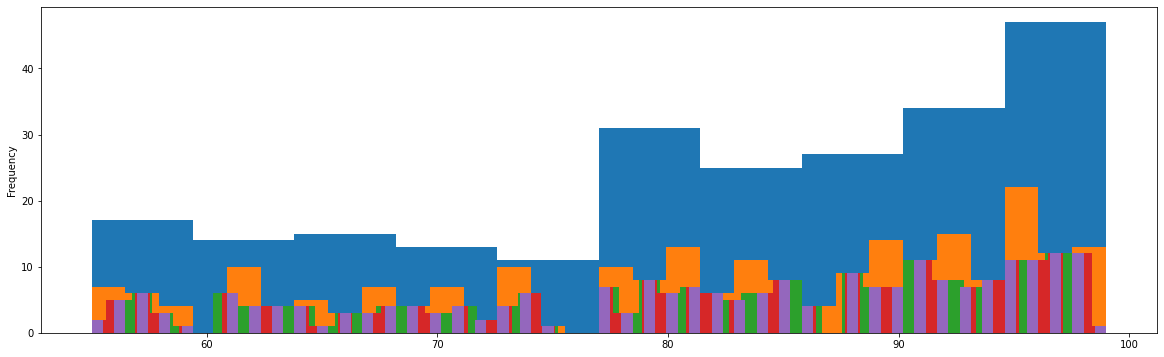

In [ ]:

for x in range(10,101,20):
  df3['user rating score'].plot.hist(bins=x, figsize = (20,6))

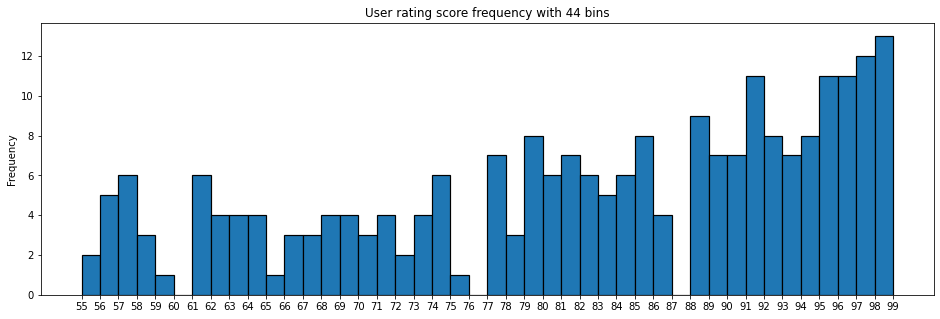

In [ ]:
  dfn=df3.copy()
  diff = dfn['user rating score'].max() - dfn['user rating score'].min() 
  diff = int(diff)
  dfn['user rating score'].plot.hist(bins=diff, edgecolor='black', linewidth=1.2, figsize = (16,5))
  plt.title(f'User rating score frequency with {diff} bins')
  plt.xticks(np.arange(dfn['user rating score'].min(), dfn['user rating score'].max() +1, 1.0))
  plt.show()

Как видим, наиболее часто встречаются оценки 97 и 98, а 60, 76 и 87 отсутствуют вообще. Первое скорее всего связано с тем, что человек хочет поделиться со всеми хорошим фильм и идет ставить оценку, в то время как на выставление оценки посредственному фильму время не все захотят потратить. 87 - пороговое значение, когда с точки зрения психологии - не дотягивает фильм до 90, ему ставят 88-89, фильм просто хороший - 85. В болонской системе 74 - пороговое значение тройки, 60 - двойки, многие зрители выросли именно на этих цифрах, и если фильм "сойдет" но не дотягивают, ему поставят максимальное возможное в рамках оценки понимании человека.

### Выведите основную информацию об оценках пользователей
- Чему равны среднее, стандартное отклонение, минимум, максимум, медиана? 
- Отличаются ли медиана и среднее? 
- Могут ли данные характеристики значительно отличаться? Почему?

Медиана и среднее отличаются, посколько большое количество шоу было выпущено в 2016 году, что сильно сместило график, в связи с чем медиана выше чем среднее.
Чем больше шоу в 2016 тем ближе медиана к 2016, но если бы у нас учитывалось, например шоу 1940го, то это бы сильно повлияло на среднее, и почти никак на медиану что и демонстрируют две строчки кода ниже.

In [ ]:
df3['user rating score'].describe().astype('int16')      #порог 1998

count    234
mean      81
std       12
min       55
25%       72
50%       84
75%       93
max       99
Name: user rating score, dtype: int16

In [ ]:
df2['release year'].describe()

count     499.000000
mean     2010.965932
std         7.833921
min      1940.000000
25%      2009.000000
50%      2014.000000
75%      2016.000000
max      2017.000000
Name: release year, dtype: float64

### В какие годы были запущены шоу, представленные в датасете?

Самое ранее - 1940. Но вплоть до 1988 были пробелы по годам. Начиная с 1989 нет ни одного года, когда не было бы выпущено шоу, которым сейчас владеет Нетфликс.

In [ ]:
create_ilist = lambda dfn: [y for y in [x for x in range(dfn['release year'].min(), dfn['release year'].max()+1)] if y not in dfn['release year'].values]
not_in_df1998 = create_ilist(df3)
not_in_df1940 = create_ilist(df)
print(f'всего с 1998 по 2017 было {len(not_in_df1998)} пропущенных годов')
print(f'всего с 1940 по 2017 было {len(not_in_df1940)} пропущеных года:\n{not_in_df1940}')

всего с 1998 по 2017 было 0 пропущенных годов
всего с 1940 по 2017 было 43 пропущеных года:
[1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1977, 1979, 1980, 1981, 1983, 1984, 1985, 1988]


### Постройте график, показывающий распределение количества запущенных шоу в зависимости от года. 

- Наблюдается ли рост? 
- Есть ли выбросы?
- Что из себя представляют выбросы?
- Чем могут быть они вызваны?

Text(0.5, 1.0, '1998-2017')

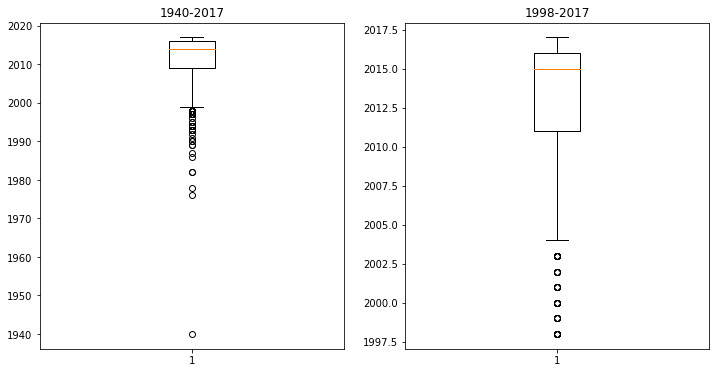

In [ ]:
#сравним по выбросам два датасета с разницев в минимальном по году
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))
ax1.boxplot(df2['release year'])
ax1.set_title(f"{df2['release year'].min()}-{df2['release year'].max()}")
ax2.boxplot(df3['release year'])
ax2.set_title(f"{df3['release year'].min()}-{df3['release year'].max()}")

Как видим, компания владеет небольшим количеством шоу выпущенных ранее появления Netflix и несмотряна то, что после 1988 года нет ни одного года, в котором бы не выходило шоу, которым ныне владеет Netflix, они имею эпизодических характер и на самом деле после появления компании рост незначителен и только после появления стриминогового сервиса в 2007м году наблюдается значительный рост с переходов во взрывной к 2016. Показатель количества 2017 ниже 2016 поскольку на момент формирования датасета год еще не закончился, что можно увидеть по большому количеству шоу без рейтинга, а так же по данным из интернета. Количество шоу в 2017 (покупка лицензий + выпуск оригинальных шоу) в итоге было больше чем в 2016. Данная картинка это подтверждает.


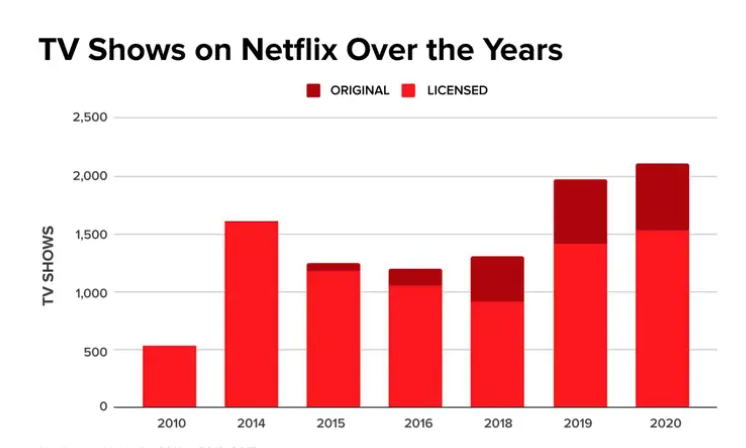

In [ ]:
#check_correlation(data)

А здесь количество ТОЛЬКО по фильмам.

https://i.insider.com/5e42e25e2dae5c6c827906c3

Теперь сравним график количества шоу начиная с самого раннего шоу которым владеет нетфликс и график с момента появления компании

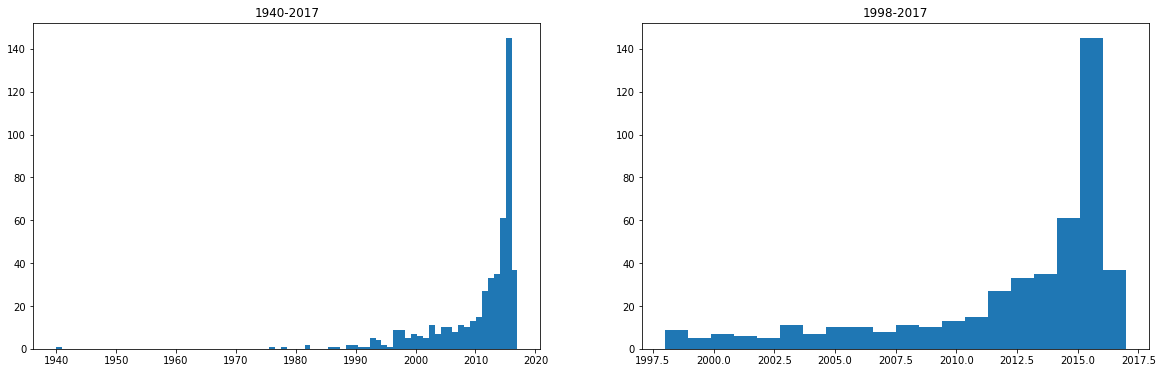

In [ ]:
year_range = lambda dfn: dfn['release year'].max() - dfn['release year'].min() + 1
dfns = [df2,df3]

fig, axs = plt.subplots(ncols=2, figsize=(20, 6))

for n in range(len(dfns)):
  axs[n].hist(dfns[n]['release year'], bins=year_range(dfns[n]))
  axs[n].set_title(f"{dfns[n]['release year'].min()}-{dfns[n]['release year'].max()}")

1. наблюдается рост после 2010 и интесивный рост после 2015 с пиком в 2017. Года, отсутствующие в таблице (1940-2017) - 43, года присутствующие - 35.

2. выбросами можно считать все ниже 1998 (34 значения после отбраковки дубликатов).

3. Нетфликс не существовал до 1997го и не был сильно популярен до запуска стриминга в 2007, но некоторые фильмы снятые раннее этого времени были выкуплены Нетфликсом. 
Поскольку старые фильмы не сильно интересуют публику, права только на редкие фильмы выкупались. Это и сформировало выброс.


### Сравните среднюю оценку пользователей в 2016 со средней оценкой в 2017. 
- Можно ли сделать вывод, что 2017 год успешнее для Netflix? ("Успешнее" значит, что пользователи в среднем ставили более высокие оценки) 
- Как еще можно оценить "Успешность"? 



Нет. **недостаточно данных о 2017** - 37 фильмов и 10 из них без оценок. Предоставленные данные были получены до конца 2017го и многие фильмы в датасет добавлены не были, равно как и оценены. В среднем средняя оценка выше чем в 2016. В 2017 чуть выше среднее и ниже std, худший фильм в 2016 получил рейтинг 56, а в 2017 - 71. При этом медиана отличается на 1.5, mean на 3.81, а рендж на 1\3.

### Как нагляднее будет показать распределение пользователям по рейтинговым группам?

Ниже представлены два графика, показывающие распределение шоу по рейтинговым группам. Какой тип графика визуально более интерпретируемый? ([Подсказка](https://sun9-40.userapi.com/c854228/v854228652/c754f/j6z5gMjJy2k.jpg))  
Постройте самостоятельно график, который считаете более интерпретируемым. Сделайте вывод.

![Charts](https://pp.userapi.com/c852024/v852024281/1a53b1/jSOsBIhxK3U.jpg)

In [ ]:

def draw_pie(dfn, target = 'rating'):
  count_rating = dfn[target].value_counts()
  labels = [f"{rating} ({count})" for rating, count in zip(count_rating.index, count_rating)]

  fig, ax = plt.subplots(figsize=(8, 8))
  ax.pie(count_rating, labels=labels, autopct='%1.1f%%') #, colors=colors, startangle=90, autopct='%1.1f%%')
  plt.title(target+' distribution')
  plt.show()

#draw_pie(df3)
#draw_pie(df1)


Поскольку рейтинговых групп у нас осталось 4, можно сказать что столбец ratingDescription выполняет роль численного показателя возрастного рейтинга. Для визуализации рейтинга с 4 группами **пайчарт подходит лучше**.

Проверим есть ли корреляция user rating score и других столбцов 

<AxesSubplot:>

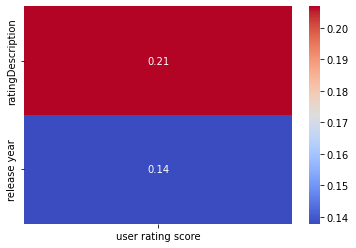

In [ ]:
corrme = df3.corr()['user rating score'].drop('user rating score')
sns.heatmap(corrme.to_frame(), annot=True, cmap='coolwarm')

Слабая корреляция на уровне 14% и 21%
Настало время перевести rating в чиcловое значение. Для этого воспользуемся one-hot-encoding

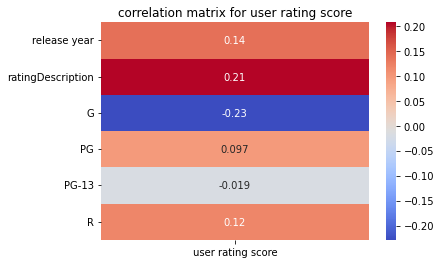

In [ ]:
def check_correlation(dfn):
  plt.title('correlation matrix for user rating score')
  ratings = pd.get_dummies(dfn['rating'])
  ratings_w = pd.concat([dfn[['user rating score', 'release year', 'ratingDescription']], ratings], axis = 1)
  corrme = ratings_w.corr()['user rating score'].drop('user rating score')
  sns.heatmap(corrme.to_frame(), annot=True, cmap='coolwarm')
  plt.show()

check_correlation(df3)

И тут тоже корреляции нет практически никакой что наводит на мысль, что не имеет смысла строить регрессионные модели. Но что-то делать с пропущенными значениями необходимо. Итого у нас несколько вариантов что делать с пустыми значениями в user rating score:

1. Отбросить пустые значения

2. Заполнить средним по столбцу

3. Заполнит средним по году

4. Заполнить в в пределах 1 STD

5. Заполнить в пределах IQR * 1.5

6. Заполнить используя центры кластеров kmeans 

7. Заполнить используя k-nearest neighbors

8. Заполнить используя линейную регрессию

**Отдельно** хотелось бы обратить внимание, что заполнение пустых ячеек в колонке рейтинга зрителей, может быть бессмысленной работой, поскольку наличествующие у нас данные, а именно год выпуска, возрастной рейтинг и его циферная интрепретация недстаточны для того, что бы верно оценить шоу. 

Как **пример** - тот факт что шоу, вышло в год, когда было много успешных шоу с рейтингом не означает что данное шоу будет успешным. 

Помимо всего прочего - сам факт отсутствия рейтинга как зрителей так и возрастного *может* говорить о том, что шоу мало кому интересно (если речь не идет о самых новых шоу).

Для того чтоб увидеть статистику нам необходимо подготовить пару **функций для визуализации**

In [ ]:
def get_bin_hist(dfn, n = False):
  diff = n if n else dfn['user rating score'].max() - dfn['user rating score'].min() 
  diff = int(diff)
  dfn['user rating score'].plot.hist(bins=diff, edgecolor='black', linewidth=1.2, figsize = (16,5))
  plt.title(f'User rating score frequency with {diff} bins')
  plt.xticks(np.arange(dfn['user rating score'].min(), dfn['user rating score'].max() +1, 1.0))
  plt.show()

def draw_boxplot(dfn):
  fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))
  ax1.boxplot(dfn['ratingDescription'])
  ax1.set_title(f"Numeric values of age rating score")
  ax2.boxplot(dfn['user rating score'])
  ax2.set_title("user rating score")
  plt.show()

def draw_pie(dfn):
  my_cols = ['rating', 'ratingDescription']
  fig, axs = plt.subplots(ncols = 2, figsize=(14, 6))
  for x in range(len(my_cols)):
    target = my_cols[x]
    count_rating = dfn[target].value_counts()
    labels = [f"{rating} ({count})" for rating, count in zip(count_rating.index, count_rating)]
    axs[x].pie(count_rating, labels=labels, autopct='%1.1f%%') #, colors=colors, startangle=90, autopct='%1.1f%%')
    axs[x].set_title(target+' distribution')
  plt.show()

def see_diff(dfn1, dfn2=df3):
  plt.figure(figsize = (12,6))
  sns.scatterplot(x='release year', y = 'user rating score', data=dfn1, color='blue')  
  dfn = dfn1[['release year','user rating score']][dfn2[['release year','user rating score']].isna().any(axis=1)]  #датасет с разницей между датасетами с заполненным и незаполненными графами
  sns.lineplot(data=dfn,x='release year', y='user rating score',estimator='max', color='green')                        #линии по заполненным средним ячейкам
  sns.scatterplot(x='release year', y = 'user rating score', data=dfn, color = 'red')   
  plt.show()       

def show_stats(dfn):
  print(pd.DataFrame(dfn.describe()['user rating score']).apply(lambda x: round(x,2)))
  print()
  draw_pie(dfn)
  get_bin_hist(dfn)
  get_bin_hist(dfn, 10)
  check_correlation(dfn)
  see_diff(dfn)
  draw_boxplot(dfn)

Сперва посмотим на статистику, если просто **отбросить пустые значения.**

       user rating score
count             234.00
mean               81.88
std                12.82
min                55.00
25%                72.25
50%                84.00
75%                93.00
max                99.00



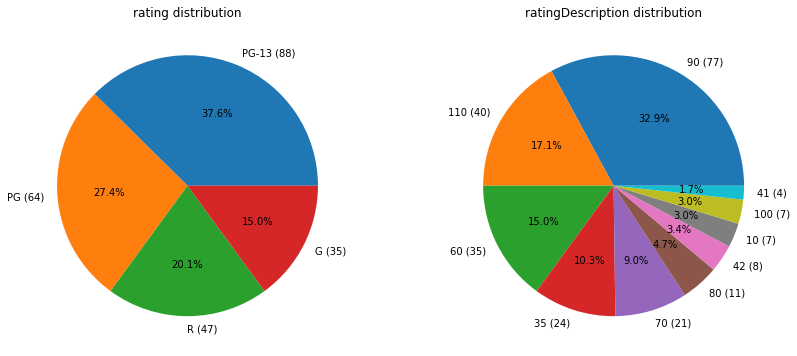

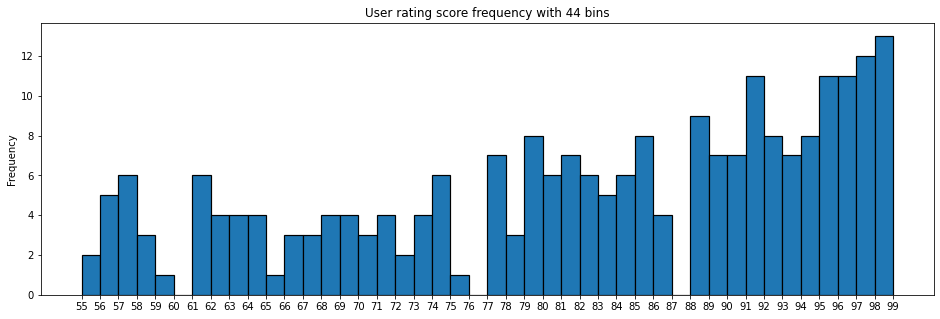

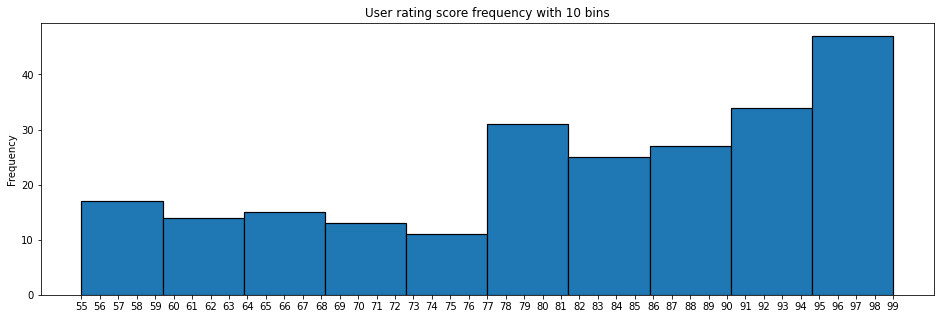

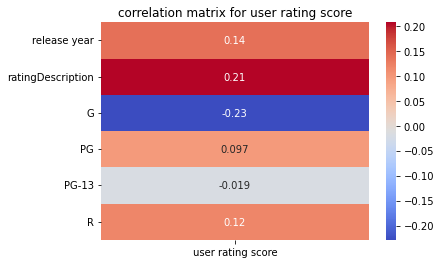

<ipython-input-34-a50084179f6c>:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfn = dfn1[['release year','user rating score']][dfn2[['release year','user rating score']].isna().any(axis=1)]  #датасет с разницей между датасетами с заполненным и незаполненными графами


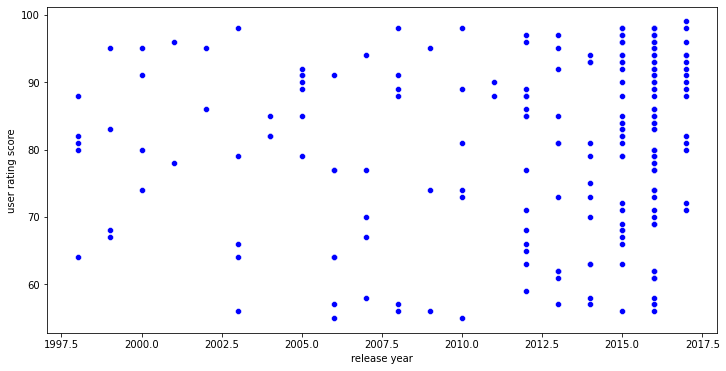

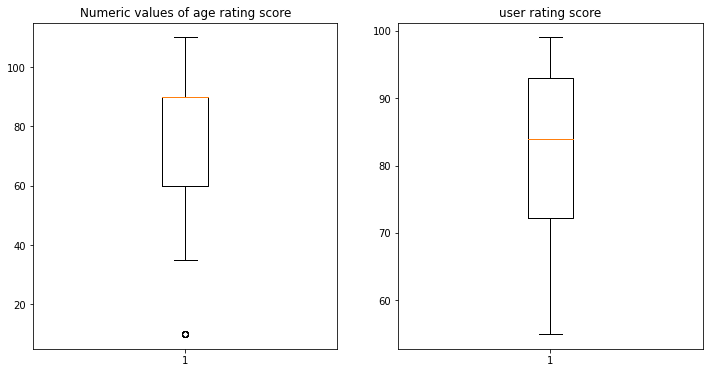

In [ ]:
dropped = df3.dropna(subset = ['user rating score'])
#pd.DataFrame(dropped.describe()['user rating score'].apply(lambda x: round(x,2)))
show_stats(dropped)

Как видим, пусть и количество данных значительно сократилось, на графиках это выглядит вполне неплохо.

**Вывод**: Вариант "дропнуть значения" имеет смысл. 

Теперь попробуем заменить пустые значения **средним по столбцу.**

       user rating score
count             465.00
mean               81.44
std                 9.09
min                55.00
25%                81.00
50%                81.00
75%                84.00
max                99.00



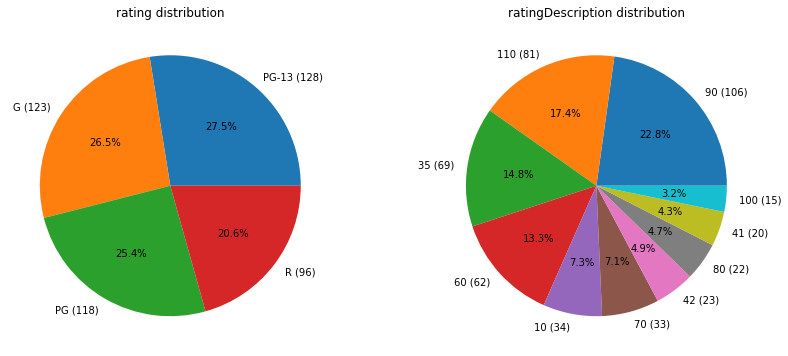

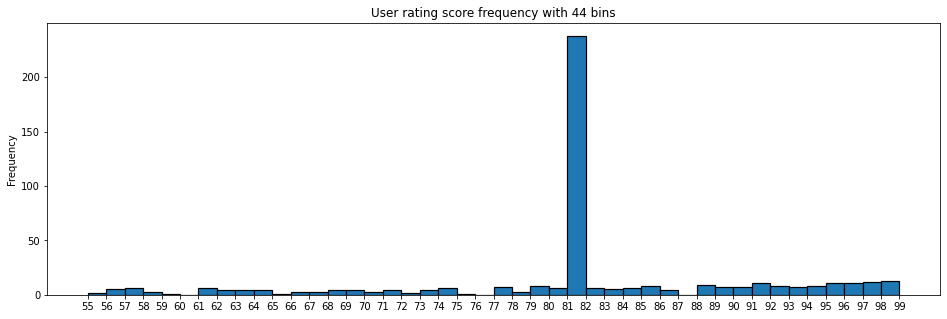

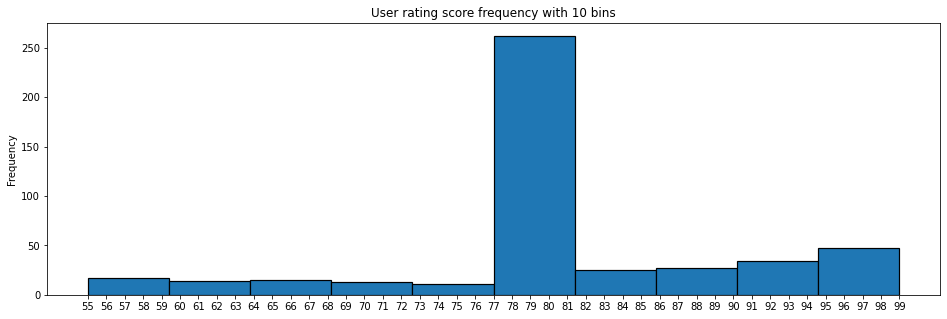

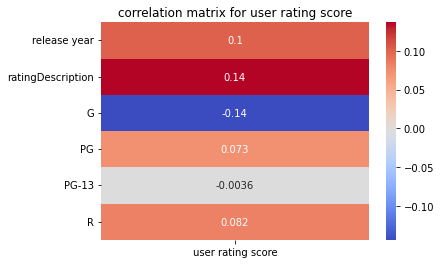

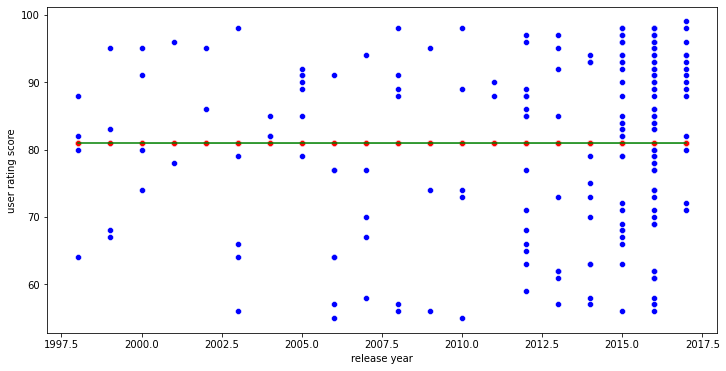

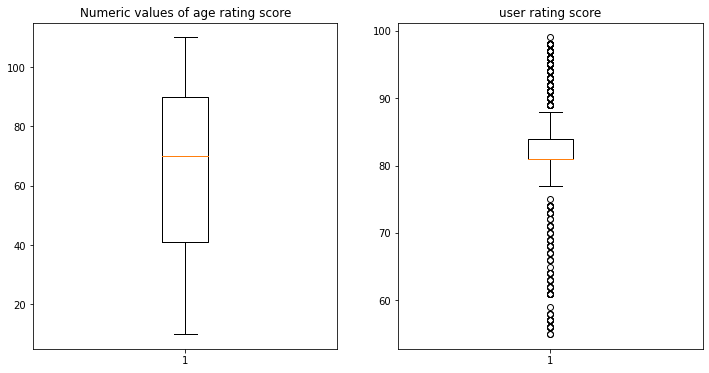

In [ ]:
mean_filled = df3.copy()
mean_filled['user rating score'].fillna(mean_filled['user rating score'].mean().astype('int16'),inplace = True)
show_stats(mean_filled)

Как видно, в данном случае, большое количество пропущенных значений значительно меняет стаистику и графики. 

**Вывод**: Вариант с заменой пропущенных значений на среднее по столбцу - не лучшая идея

Как продолжение этой идеи - можно раскидать **значения в пределах одной STD** 

       user rating score
count             465.00
mean               81.82
std                10.40
min                55.00
25%                74.80
50%                82.55
75%                90.38
max                99.00



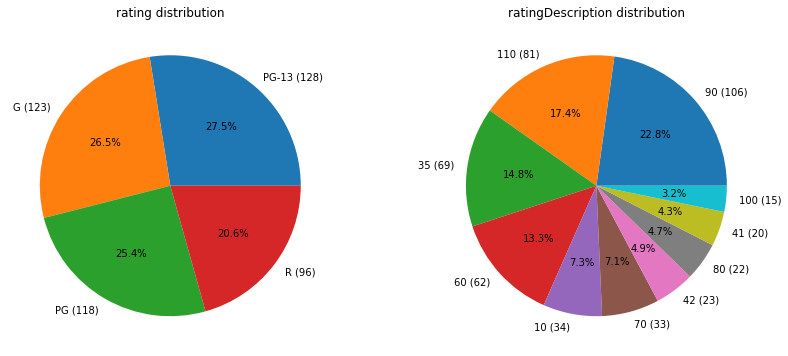

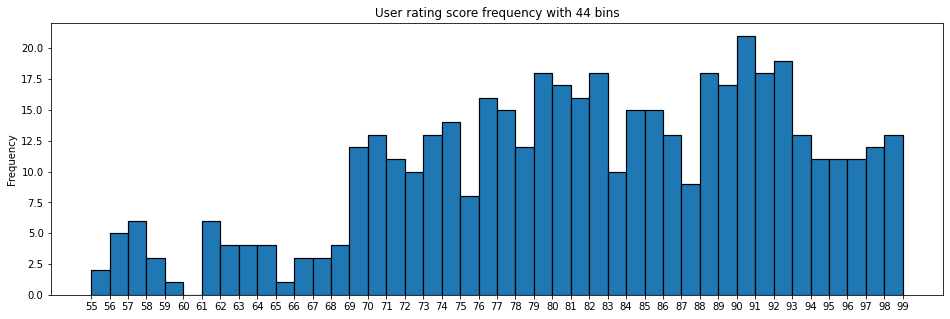

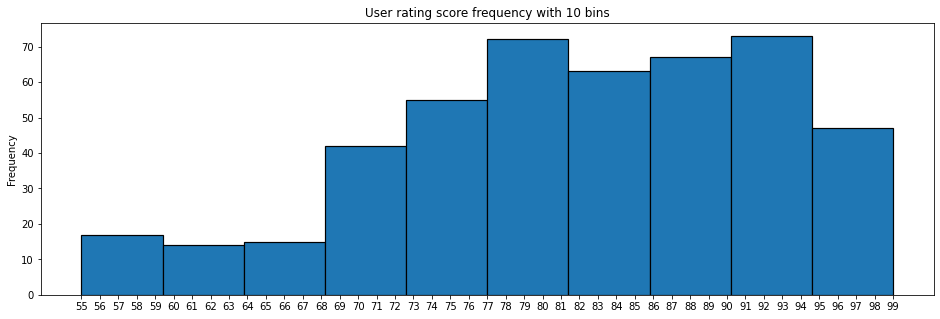

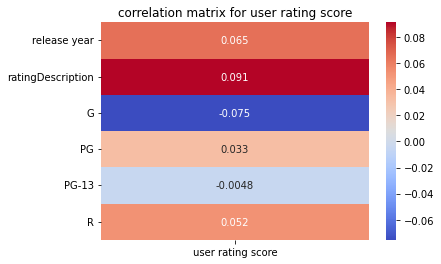

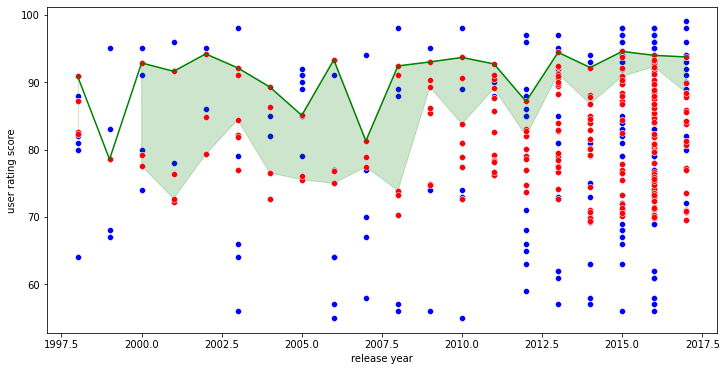

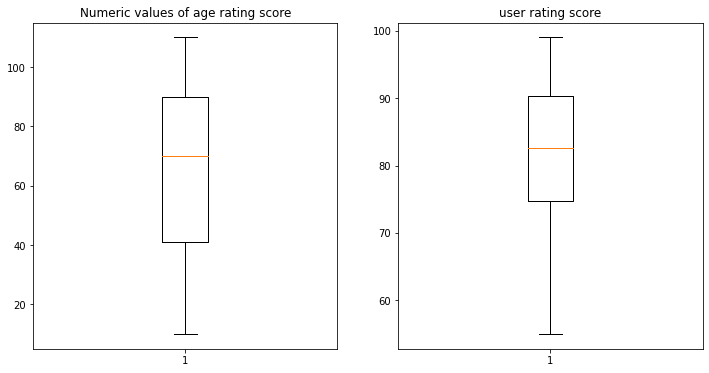

In [ ]:
std_filled = df3.copy()
std_filled_mean = std_filled['user rating score'].mean()
std_filled_std = std_filled['user rating score'].std()

def fill_missing_with_rand_std(x, std_n = 1):
  std_min = std_filled_mean - std_filled_std * std_n
  std_max = std_filled_mean + std_filled_std * std_n
  if pd.isna(x):
    return np.random.uniform(std_min, std_max)
  else: 
    return x 


std_filled['user rating score'] = std_filled['user rating score'].apply(fill_missing_with_rand_std)
#std_filled['user rating score'].fillna(lambda x: np.random.normal(std_filled_mean, std_filled_std_) if pd.isna(x) else x, inplace=True)

show_stats(std_filled)

Как видим теперь значения распределены более равномерно, использовалась uniform расределение, в пределах одной стандартной девиации. Данны распределены ровно. Понизилось общее std.

**Вывод**: Этот метод интересен и имее право на существование.


Для разнообразия также попробуем рандомное значение в пределах **IQR х 1.5**

       user rating score
count             465.00
mean               81.93
std                 9.12
min                55.00
25%                80.51
50%                82.19
75%                84.27
max                99.00



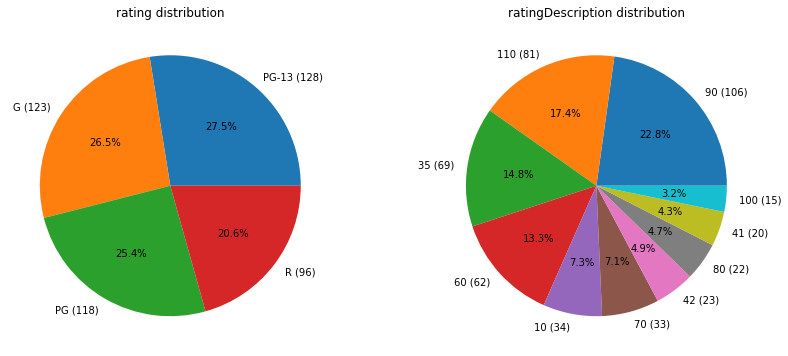

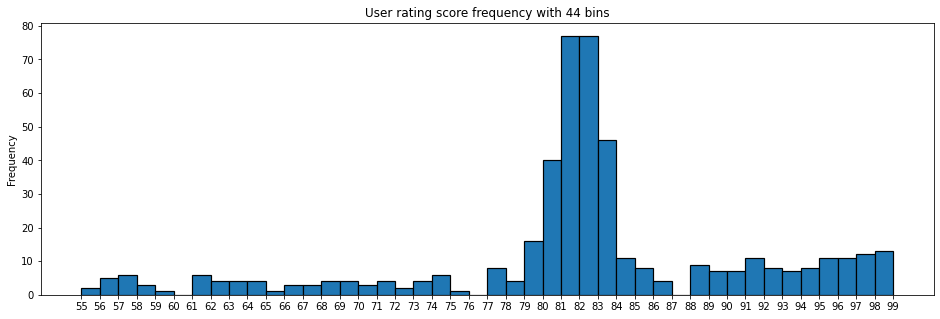

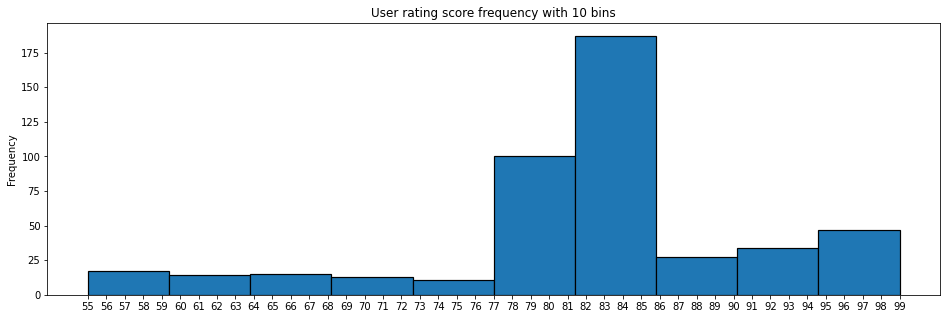

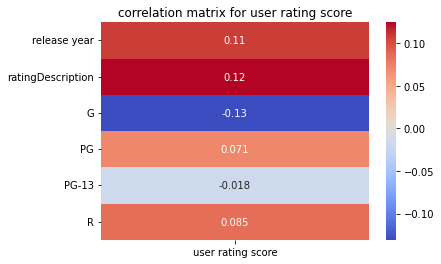

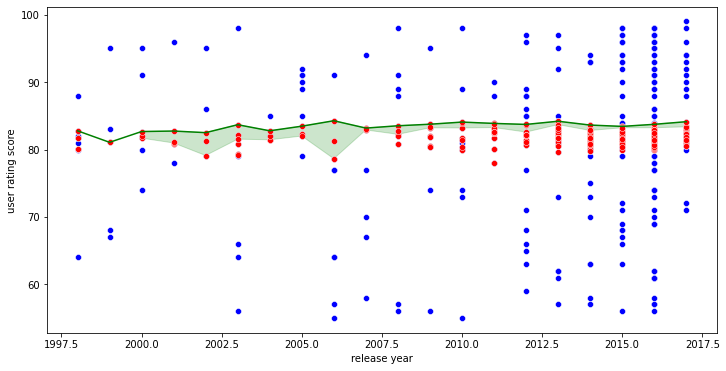

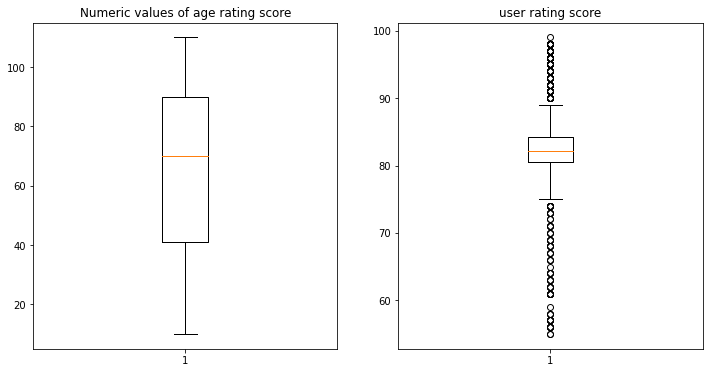

In [ ]:
iqr_filled = df3.copy()
iqr_filled_mean = iqr_filled['user rating score'].mean()
iqr_filled_min = iqr_filled['user rating score'].quantile(0.25)
iqr_filled_max = iqr_filled['user rating score'].quantile(0.75)
iqr_range = (iqr_filled_max - iqr_filled_min) * 1.5

def fill_iqr_normal(x, std=1):
  if pd.isna(x):
    while True:
      random_number = np.random.normal(loc=iqr_filled['user rating score'].mean(), scale=std)
      if random_number > 54 and random_number < 100:
        break
    return random_number
  else: 
    return x

def fill_iqr_uniform(x):
    number = np.random.uniform(iqr_filled_min-iqr_range, iqr_filled_max+iqr_range)
    if not (54 < number < 100):
      return fill_iqr_uniform(x)
    else:
      return number
  #else: 
    #return x 

distribution = fill_iqr_normal

iqr_filled['user rating score'] = iqr_filled['user rating score'].apply(distribution)
show_stats(iqr_filled)

Поскольку наши данные имеют левое искажение (left-skewed - большая часть сосредоточенна справа), и поскольку наши данные обрезаны в промежутке от 55 до 100, то интерквартальный интервал * 1.5 в нашем случае будет около 31, а среднее значение 81, и если мы заполняем пустые места с помощью рандомного значения iqr x 1.5, то иногда результат выйдет за пределы нашего минимума и максимума. 

В случае с uniform используем рекурсию, чтоб попробовать еще раз рандомизировать значение если оно выходят за рамки нашего желаемого результата. Поскольку наши данные имеют левое искажение, разница между максимальным значением и средним меньше чем разница между минимальным значением и средним. Итогом использования рекурсии будет изменение распределения данных, что приводит их к более "нормальному" распределению, без искажения, но искажает саму суть статистики по этой колонки.

В случае нормального распределения - слишком много значения попадают на среднее и этот метод лишь слегка лучше замены средним по столбцу.

**Вывод**: Этот метод приносит слишком много искажения и им пльзоваться не стоит.

Обратим внимание на возможность заполнить пустые места в рейтинге **средним за год.**

       user rating score
count             465.00
mean               81.57
std                 9.79
min                55.00
25%                76.00
50%                83.00
75%                88.00
max                99.00



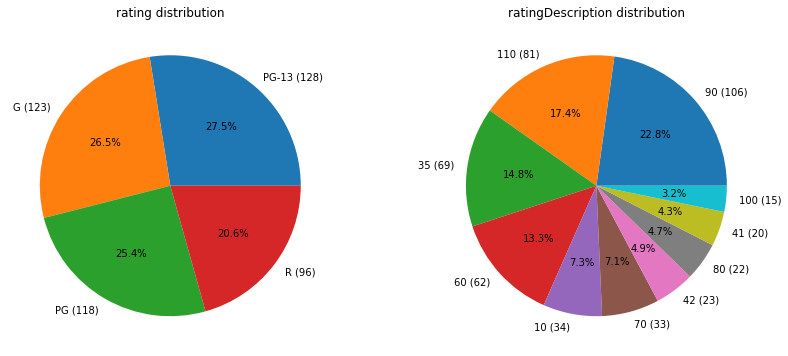

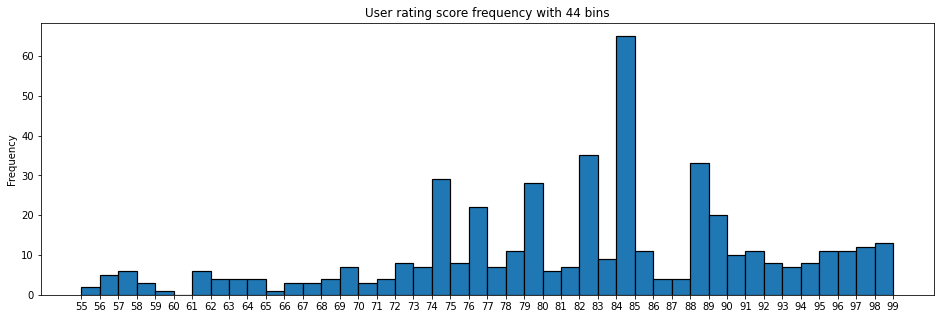

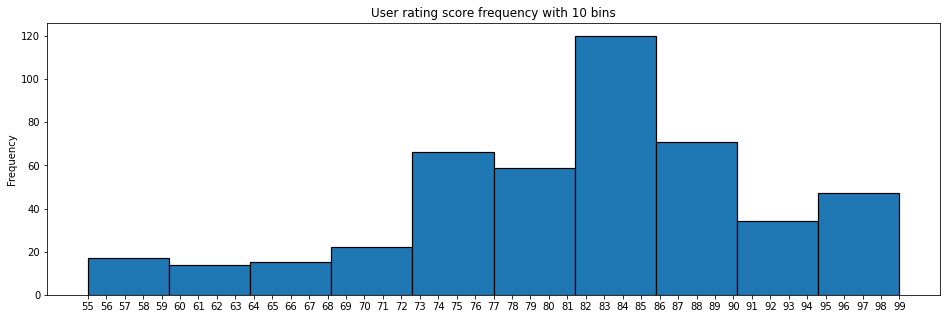

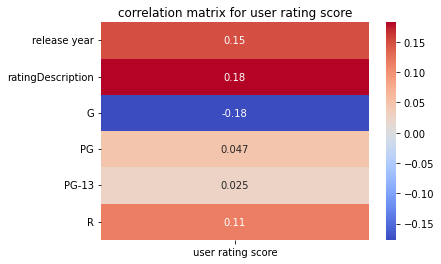

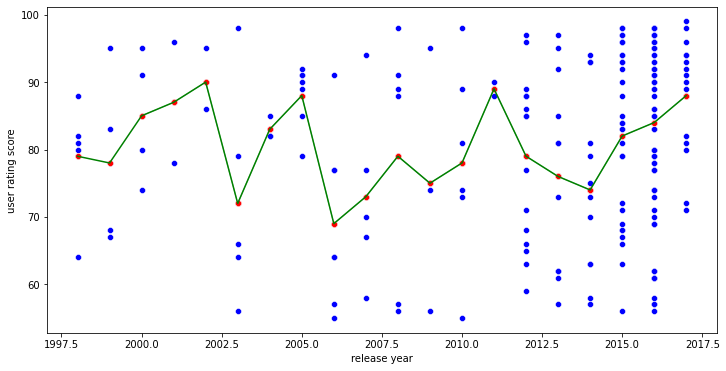

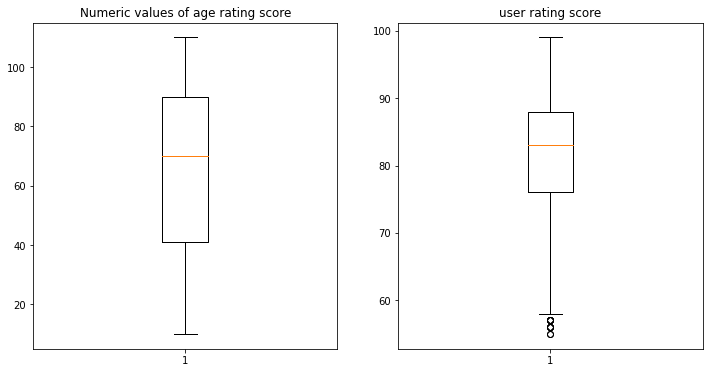

In [ ]:
find_year_means = df3.groupby('release year')['user rating score'].transform('mean')
year_bins = df3.copy()
year_bins['user rating score'] = year_bins['user rating score'].fillna(find_year_means).astype(np.int32)

show_stats(year_bins)

Мы взяли срденее значение по группе за каждый год и подставили его в пустые места user rating score за соответствующий год. 

Мы наложили и соединили линией новые значения среднего на датасет чтоб визуализировать как это выглядит. 

Наша описательная функция показывает нам что данные распределены вполне равномерно, но, имеется большое количество значений 84, поскольку часто именно в этом промежутке выходило среднее.

*Еще раз* стоит обратить внимание, что большое количество хороших фильмов в году не означет что отдельно взятый фильм будет тоже хорошим. Более того, поскольку мы заменяем средним по году, даже один плохой фильм может значительно понизить рейтинг, а если в году было мало фильмов, то его влияние еще выше. Создавать искуственно порогвые значения для подсчета нецелесообрано поскольку этот метод рассматривается исключительно в эмпирических целях.

**Вывод**: Довольно интересный метод, которым можно воспользоваться, с вышеописанными оговорками.


Воспользуемся методами **машинного обучения** для заполнения пустых значений. Для этого нам понадобятся некоторые **метрики**

In [ ]:
#Для регрессий
def get_prediction(model, X_test, y_test):
  y_pred = model.predict(X_test)
  mse = round(mean_squared_error(y_test, y_pred),3)
  rmse = round(np.sqrt(mse),3)
  r2 = round(r2_score(y_test,y_pred),3)
  mae = round(mean_absolute_error(y_test,y_pred),3)
  print(f'MSE: {mse}\nRMSE: {rmse}\nMAE:{mae}\nR2: {r2}')


Для того чтоб вспользоваться методом **Kmeans** сперва посмотрим на какие кластеры можно разбить наши данные.

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


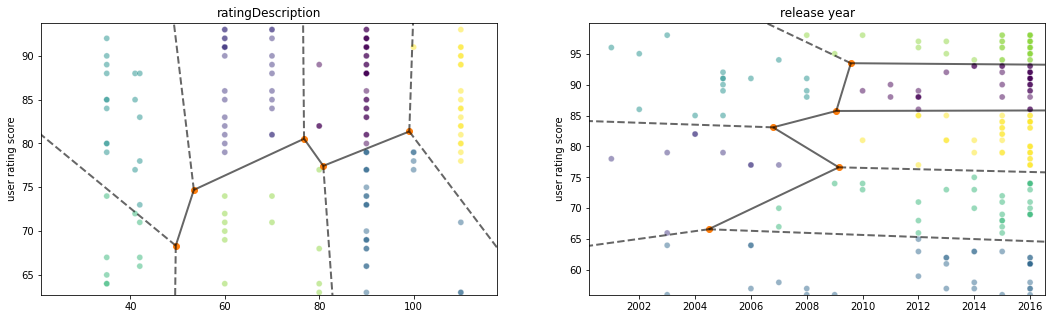

In [ ]:
fig, axs = plt.subplots(ncols = 2,figsize = (18,5))
df4=df3.copy()

def get_clusters(onwhat, clusternum = 4):
  X = df4[[onwhat, 'user rating score']].dropna(subset=['user rating score']).values
  kmeans = KMeans(n_clusters=clusternum, random_state=42)
  kmeans.fit(X)
  labels = kmeans.predict(X)
  return X, labels, kmeans

clusters = 7
toplot = ['ratingDescription', 'release year']
for num in range(len(toplot)):
  X, labels, kmeans = get_clusters(toplot[num], clusternum = clusters)
  sns.scatterplot(x = X[:,0], y= X[:,1], c= labels, alpha = 0.5, ax = axs[num])
  axs[num].set_title(toplot[num])
  axs[num].set_ylabel('user rating score')
  #Воспользуемся Воронои плот для визуализации кластеров
  vor = Voronoi(kmeans.cluster_centers_)
  voronoi_plot_2d(vor, show_verices = False, line_color='gray', line_width=2, line_alpha=0.6, point_size=0, ax=axs[num])

plt.show()

Kmeans можно было бы использовать для того что бы назначить среднее по центру кластера, но не похоже, что этот метод даст нам ожидаемый результат и в зависимости от взятых колонок и количества соседей, может дать примерно такой же результат что и среднее по, например, годам. Отрисовка граней кластеров с помощью Voronoi plot дает нам более явное понимание границ кластеров, но не дает четкого понимания зависимостей в распределении, а сама кластеризация показывает, что нет особой связи между колонками.

**Вывод**: Этот метод использовать не стоит в силу неопределенности демонстрируемых кластеров.

Перейдем к другим методам. Возьмемся за **Линейную регрессию**.

MSE: 128.238
RMSE: 11.324
MAE:9.308
R2: -0.273
       user rating score
count             465.00
mean               80.57
std                 9.94
min                55.00
25%                74.65
50%                81.55
75%                85.85
max                99.00



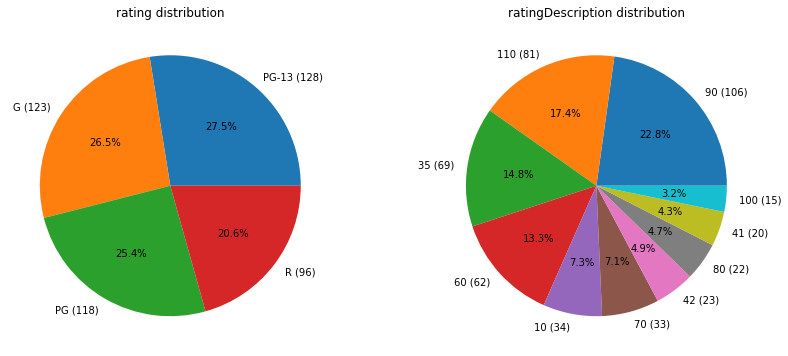

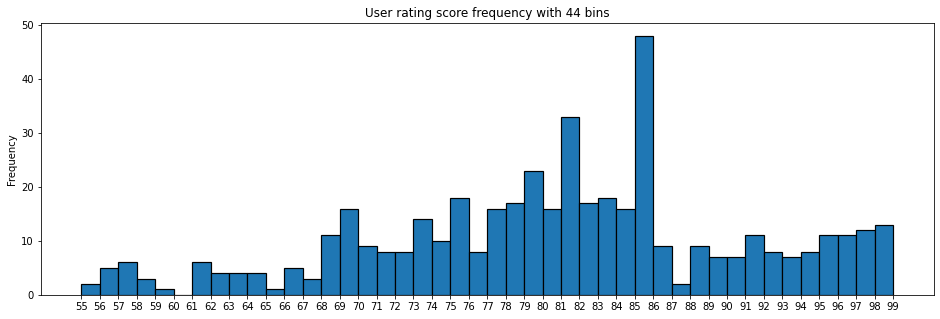

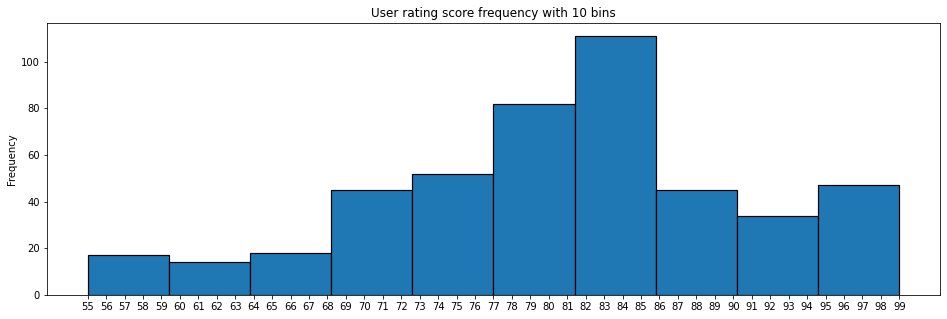

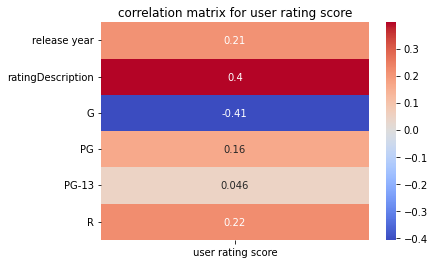

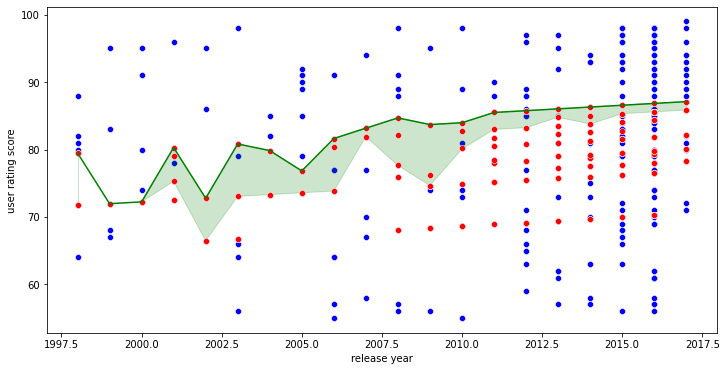

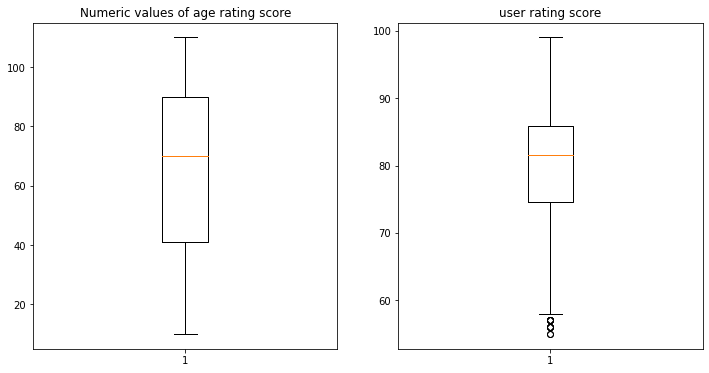

In [ ]:
df4=df3.copy()
df5=df3.copy()
ratings = pd.get_dummies(df4['rating'])
df4 = pd.concat([df4[['user rating score', 'ratingDescription', 'release year']], ratings], axis=1)

#разбиваем на датасет с пустыми и без пустых рейтингов
df_lin_nan = df4[df4['user rating score'].isna()]
df_lin = df4.dropna(subset = ['user rating score'])


#Разбиваем на тренировочный и целевые параметры
X = df_lin[["release year", 'ratingDescription', 'G','PG','PG-13','R']]
y = df_lin["user rating score"]

#Разбиваем данные для теста и трейна. нет стратификации поскольку есть некоторые группы где лишь 1 значение
#test size 10% потому что у нас небольшое количество данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)

#реализуем модель
ln_model = LinearRegression()
ln_model.fit(X_train, y_train)

#Предиктим и заменяем значения в датасете
X_missing = df_lin_nan[['release year','ratingDescription', 'G','PG','PG-13','R']]
predicted = ln_model.predict(X_missing)
df5.loc[df['user rating score'].isna(), 'user rating score'] = predicted


get_prediction(ln_model, X_test, y_test)
show_stats(df5)

Как можем наблюдать, линейная регрессия распределила тоже вполне равномерно, нельзя утверждать что произошел оверфиттинг. На таком небольшом датасете пришлось уменьшить размер тестовых данных.

**Вывод**: Несмотря на то, что год и возрастной рейтинг не должеы влиять на рейтинги шоу, линейная регрессия справилась неплохо.

Рассмотрим **KNN**

MSE: 229.509
RMSE: 15.15
MAE:12.833
R2: -0.632
       user rating score
count             465.00
mean               79.80
std                11.12
min                55.00
25%                71.00
50%                80.00
75%                90.00
max                99.00



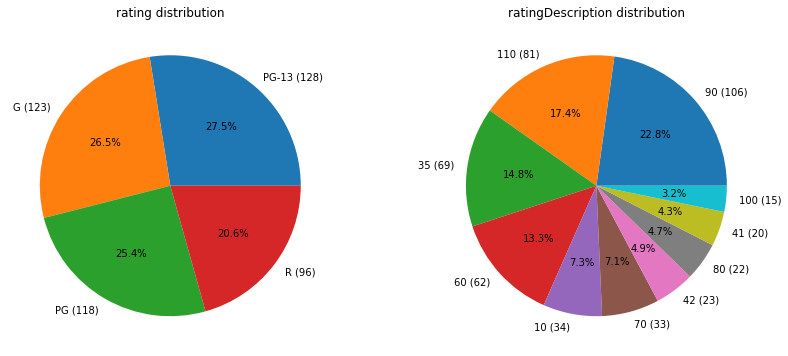

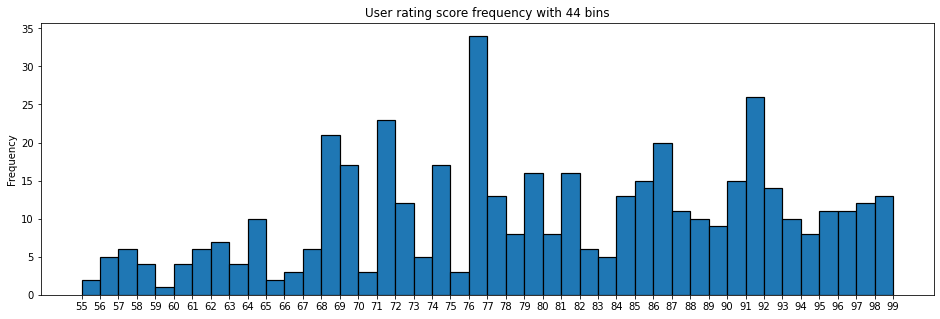

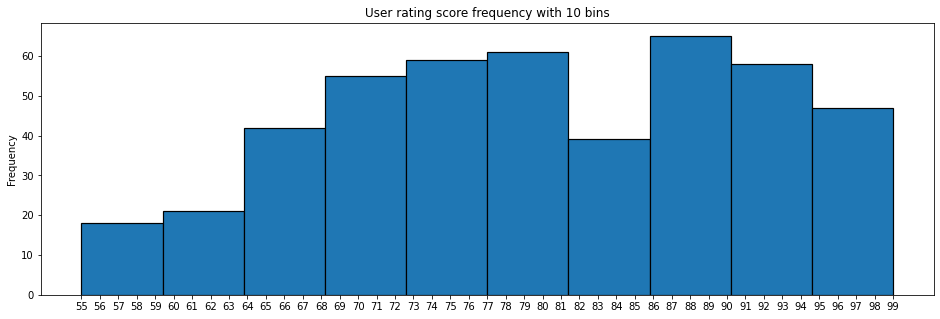

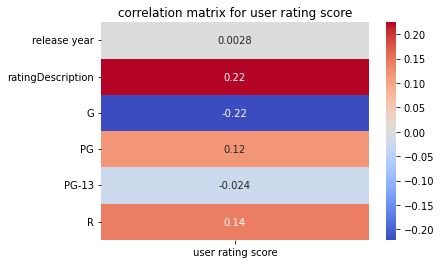

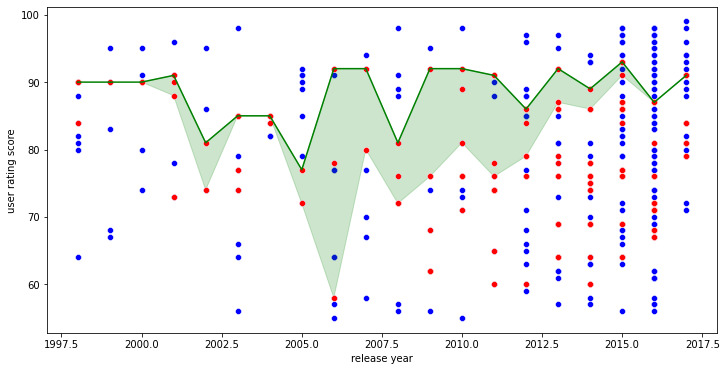

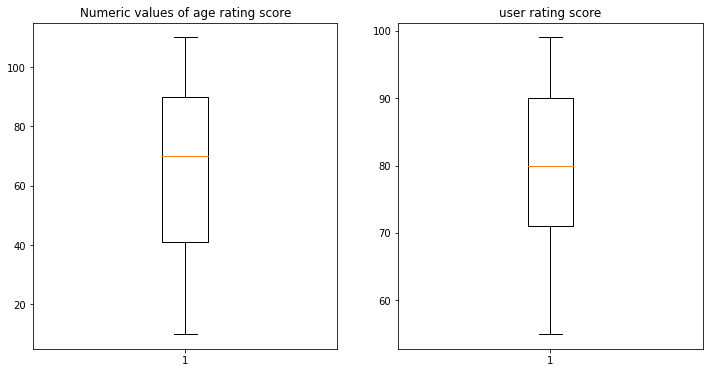

In [ ]:
df4 = df3.copy()
knn_result = df3.copy()

#one hot encoding
ratings = pd.get_dummies(df4['rating'])
df4 = pd.concat([df4[['user rating score', 'ratingDescription', 'release year']],
                    ratings], axis=1)

#создаем тренировочный сет с непустыми значениями
mask = df4['user rating score'].notna()
train = df4[mask]

#тестовый сет где все значения пустые
test = df4.copy()
test['user rating score'] = pd.Series([np.nan]*len(test))

#создаем тренировочный сет из рабочих данных и проверочных лейблов
X_train = train.drop('user rating score', axis=1)
y_train = train['user rating score']

#создаем тестовый сет из рабочих данных и проверочных лейблов
X_test = test.drop('user rating score', axis = 1)
y_test = test['user rating score']

#разбиваем тренировочный сет на тренировочный + сет для валидация. мало данных. низкий размер тестовый
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
                                                test_size=0.1, random_state=42)

#пилим модель
k = 3
knn = KNeighborsRegressor(n_neighbors=k)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_val)

#предсказываем и заполняем пустые месте
y_test_pred = knn.predict(X_test)
test['user rating score'] = np.where(test['user rating score'].isna(), y_test_pred, test['user rating score'])
knn_result['user rating score'] = test['user rating score']
df4 = df3.copy()
df4['user rating score'] = df4['user rating score'].fillna(knn_result['user rating score'].astype('int16'))

#валидация + статистика
get_prediction(knn, X_val, y_val)
show_stats(df4)


КНН не выдает выбросов на боксплоте, но на пару единиц занижат среднее значение, а СТД остается довольно высоким, любопытно, что только 3 соседей дает такое значение в то время как остальные 2-10 чуть более близкое к истинному среднее и более низкую СТД. Тем не менее гистограма вполне соответсвует такой из наших первоначальных данных.

**Вывод**: Этот метод имеет право на существование.

### Теперь вам нужно выбрать любое из представленных шоу и при помощи изученных инструментов составить описательный портрет этого шоу :) 
Аналитики и Data Scientist-ы очень любят все сравнивать, поэтому при составлении описательного портрета рекомендуем вам сравнить выбранное шоу с другими по каким-либо характеристикам. Результаты не забудьте внести в презентацию. При возникновении трудностей обязательно пишите в чат, преподавателю или ассистентам.

In [40]:
df4 =df3.copy()
df4 = df4.dropna(subset = ['user rating score'])

ratings = pd.get_dummies(df4['rating'])
df_na = pd.concat([df4[['user rating score', 'ratingDescription', 'release year']],
                    ratings], axis=1)

X  = df_na[['user rating score', 'release year', 'ratingDescription']+list(ratings.columns)]
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

db_scan = DBSCAN(eps=3, min_samples = 10)    #Play with hyperparameters
db_scan.fit(X_std)

df4['cluster'] = db_scan.labels_
n_clusters = len(set(db_scan.labels_)) - (1 if -1 in db_scan.labels_ else 0)

cl1= df4[(df4['title']=='Star Wars: The Clone Wars')]['cluster'] #& (df4['release year']==2014)]['cluster'] for only one Star wars show cluster in case they get to different ones
df4[df4['cluster'].isin(cl1.values)]

,title,rating,ratingDescription,release year,user rating score,cluster
4,How I Met Your Mother,PG,70,2014,94.0,1
10,Once Upon a Time,PG,70,2016,98.0,1
13,Naruto,PG,70,2008,88.0,1
27,The Flash,PG,70,2016,98.0,1
33,Trollhunters,PG,42,2016,83.0,1
60,Glee,PG,70,2015,92.0,1
86,Zootopia,PG,60,2016,97.0,1
88,Finding Dory,PG,60,2016,98.0,1
91,Pete's Dragon,PG,60,2016,93.0,1
98,Cheer Squad,PG,70,2016,61.0,1


Хотелось бы сравнить два сезона "Звездные войны: война клонов" 2008 и 2014 годов.

Первый сезон начал выходить в октябре 2008 году и закончился 20 марта 2009 года, а весь 6 сезон выпустили за один год и интересным может показаться, что второй сезон был выпущен полностью в один день. 

Нетфликс выкупил права на мультсериал только в 2014 году, тем самым дав ему новую жизнь, т.к. Lucasfilm планировали закрыть сериал.

Стоит отметить огромную разницу в оценке пользователей, первый сезон получил в два раза меньшие результаты по сравнению с шестым сезоном. Причин этому много: возрасло качество графики и съемки, увеличился бюджет и т.д.

Так же у шестого сезона можно заметить немного возросший возрастной рейтинг, это может быть связано с тем, что увеличилось количество сцен с сражениями.
